# Exploratory Data Analysis
The purpose of this notebook will be to take a preliminary look at the full training data available in the Titanic Kaggle competition. I will be searching for entries which need to be cleaned, developing strategies for replacing missing data, and uncovering patterns with visualizations. 
## Titanic Dataset - Kaggle
(Source: https://www.kaggle.com/competitions/titanic/data)

In [1]:
import pandas as pd

# Read data
X = pd.read_csv('data/train.csv')

# Select numeric and categoric columns
numeric_cols = [cname for cname in X.columns 
                if X[cname].dtype in ['int64', 'float64']]
categoric_cols = [cname for cname in X.columns
                  if X[cname].dtype == 'object']

In [2]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Summary Stats for Numeric and Categoric Data

In [3]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
X[categoric_cols].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Order of embarkation

1. Southampton
2. Cherbourg
3. Queenstown

I am considering making 'Embarked' an ordinal variable, because there is a natural order to when the passenger embarked based on where they embarked, due to the ship's route. My theory is, the order at which a person embarked could affect where they were lodged on the ship, therefore having potential to affect the person's chance of survival. 

Further analysis and research is needed. It would be worth investigating relationships between 'Embarked', 'Cabin', and 'Ticket', as they could be related to eachother. 

## Null Values

In [5]:
X.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Cabin

There is a significant portion of null values for 'Cabin':

In [6]:
cabin_null_portion = X['Cabin'].isnull().sum()/len(X['Cabin'].index)
print(f'Cabin null values: {cabin_null_portion}')

Cabin null values: 0.7710437710437711


In [7]:
X.drop_duplicates(subset=['Cabin'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


There may be a relationship between 'Pclass' and the NaN value for Cabin

In [8]:
for pclass in X['Pclass'].unique():
    nulls = X[X['Pclass']== pclass].Cabin.isnull().sum()
    print(f'Pclass level: {pclass} has {nulls} null values for Cabin')

Pclass level: 3 has 479 null values for Cabin
Pclass level: 1 has 40 null values for Cabin
Pclass level: 2 has 168 null values for Cabin


It appears Lower classes have their Cabin number recorded much less frequently then upper classes. I could impute the nulls with the most frequent value for each class, but that would create dependence between 'Pclass' and 'Cabin'.

In [9]:
for pclass in X['Pclass'].unique():
    valuecount = X[X['Pclass']== pclass].Cabin.value_counts()
    print(f'Pclass level: {pclass} value counts: \n{valuecount}\n')

Pclass level: 3 value counts: 
G6       4
F G73    2
E121     2
F E69    1
E10      1
F G63    1
F38      1
Name: Cabin, dtype: int64

Pclass level: 1 value counts: 
B96 B98        4
C23 C25 C27    4
C22 C26        3
E24            2
E67            2
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 133, dtype: int64

Pclass level: 2 value counts: 
F33     3
E101    3
F2      3
D       3
F4      2
D56     1
E77     1
Name: Cabin, dtype: int64



The Cabins in the Titanic appear to be numbered based on a system where the first letter indicates the deck. The topmost deck is 'A' and bottom deck is 'G' 
<img src="Images/Olympic_&_Titanic_cutaway_diagram.png" align="middle" width="350" />
(Source: https://en.wikipedia.org/wiki/First-class_facilities_of_the_Titanic)

Due to the labeling system of the cabins, it seems likely to be a strong indicator of survival chance. Passengers on deck 'G' would likely experience significant difficulty reaching life boats on the upper decks. According to wikipedia, nearly all of the passengers who did not make it into a lifeboat did not survive, therefore lifeboat accessibility is likely a great predictor of survival. 
(Source: https://en.wikipedia.org/wiki/Sinking_of_the_Titanic)

I am leaning on making an ordinal 'Deck' Variable based on the first letter of the 'Cabin' value. There may be further information contained in the number following the deck letter, so I will not alter that for now. 

As for the null values of 'Cabin', I am considering a couple options:

1. Impute 'Deck' with the most frequent value of 'Deck' for that class
2. Impute 'Deck' with the most frequent value of 'Deck' for all passengers
3. Impute 'Deck' with a constant 'missing_value'
4. Search for other patterns to derive 'Deck' value based on combinations of other features

My main concern is in creating dependence between features, which should be avoided. 

## Ticket Variable

It appears there may be some meta-data in the 'Ticket' variable. Some tickets have a sequence of letters in front of the ticket number. This could be a representation of passenger status, such as crew or VIP. It is worth investigating potential relationships.

In [10]:
X['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Apparently, it is possible for multiple passengers to have the same ticket number.

In [11]:
X[X['Ticket']== '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


This subset is incredibly useful, as it provides us an understanding of the data structure and relationships between passengers. It appears the ticket number represents one purchase of multiple tickets. We can see ticket '347082' was held by 7 passengers. All 7 passengers share the last name 'Andersson'. Combined with the ages, genders, and values for 'SibSp', 'Embarked', 'Parch', it is resonable to assume this was likely one family, who purchased their tickets in one transaction. 

Each passenger has the same fare: 31.275, which is potentially the total fare paid for all 7 tickets, as it is the same regardless of age. This would be sensible, because, according to "Titanic facts and figures", a 3rd class ticket should cost around £7. At that price 7 tickets would cost about £49, which is resonably close to the fare paid by the Andersson's when considering there may be differences in individual ticket prices for their children.
(Source: https://www.bbc.co.uk/bitesize/topics/z8mpfg8/articles/zng8jty#:~:text=Titanic%20was%20a%20luxurious%20ship,more%20than%20%C2%A33300%20today.)



## Target Variable - Survived

In [14]:
X['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
perc_survived = round((len(X[X['Survived']== 1].index) / len(X.index)), 2) * 100
perc_survived
print(f'{perc_survived}% of passengers in this dataset survived')

38.0% of passengers in this dataset survived


In [39]:
import seaborn as sns
sns.set_theme(style='darkgrid')
%matplotlib inline

<Axes: xlabel='Pclass', ylabel='count'>

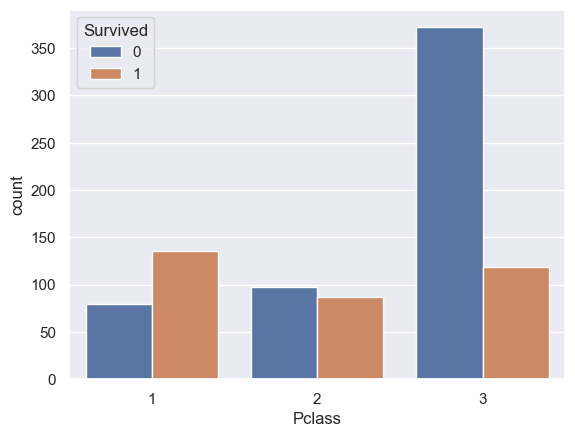

In [43]:
sns.countplot(
    data=X,
    x='Pclass',
    hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

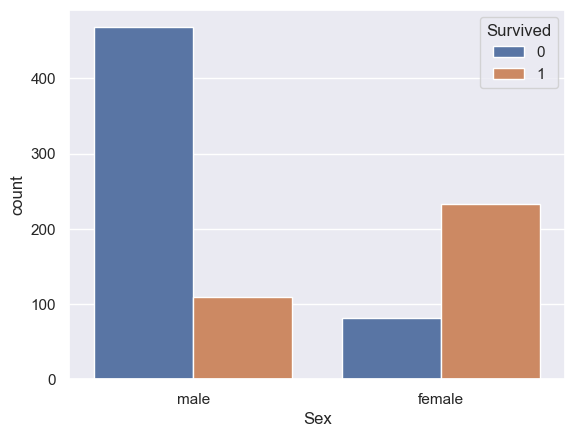

In [44]:
sns.countplot(
    data=X,
    x='Sex',
    hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

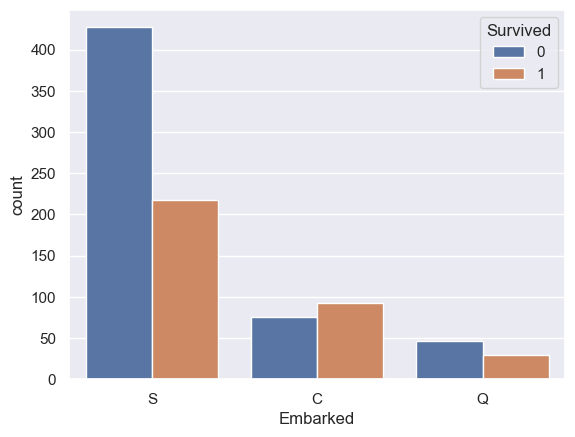

In [45]:
sns.countplot(
    data=X,
    x='Embarked',
    hue='Survived')